In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import os

## Leiden clusters from adata

In [4]:
adata_leiden = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_68k_Zheng/Zheng_PBMC_HVG2000_leiden_subset.h5ad')
adata_leiden.obs.head()

,celltype,TSNE.1,TSNE.2,leiden_cluster
AAACATACACCCAA-1,CD8+ Cytotoxic T,7.565540,0.441370,Leiden_1
AAACATACCCCTCA-1,CD8+/CD45RA+ Naive Cytotoxic,2.552626,-25.786672,Leiden_4
AAACATACCGGAGA-1,CD4+/CD45RO+ Memory,-5.771831,11.830846,Leiden_0
AAACATACTAACCG-1,CD19+ B,1.762556,25.979346,Leiden_7
AAACATACTCTTCA-1,CD4+/CD25 T Reg,-16.793856,-16.589970,Leiden_3


## get unique celltypes from each leiden cluster

In [18]:
leiden_clusters = adata_leiden.obs['leiden_cluster'].unique()

unique_cts_dict = {}
for clus in leiden_clusters:
    unique_cts = adata_leiden.obs[adata_leiden.obs['leiden_cluster'] == clus]['celltype'].unique()
    unique_cts_dict[clus] = list(unique_cts)

In [46]:
from collections import OrderedDict

leiden_clusters = adata_leiden.obs['leiden_cluster'].unique()

unique_cts_dict = {}
for clus in sorted(leiden_clusters):
    unique_cts = sorted(adata_leiden.obs[adata_leiden.obs['leiden_cluster'] == clus]['celltype'].unique())
    unique_cts_dict[clus] = unique_cts

# Turn unique_cts_dict into ordered dict, sort keys by name
unique_cts_dict = OrderedDict(sorted(unique_cts_dict.items()))

In [47]:
unique_cts_dict

OrderedDict([('Leiden_0',
              ['CD14+ Monocyte',
               'CD19+ B',
               'CD34+',
               'CD4+ T Helper2',
               'CD4+/CD25 T Reg',
               'CD4+/CD45RA+/CD25- Naive T',
               'CD4+/CD45RO+ Memory',
               'CD8+ Cytotoxic T',
               'CD8+/CD45RA+ Naive Cytotoxic',
               'Dendritic']),
             ('Leiden_1',
              ['CD19+ B',
               'CD4+ T Helper2',
               'CD4+/CD25 T Reg',
               'CD4+/CD45RA+/CD25- Naive T',
               'CD4+/CD45RO+ Memory',
               'CD56+ NK',
               'CD8+ Cytotoxic T',
               'CD8+/CD45RA+ Naive Cytotoxic',
               'Dendritic']),
             ('Leiden_10',
              ['CD14+ Monocyte',
               'CD19+ B',
               'CD34+',
               'CD4+ T Helper2',
               'CD4+/CD25 T Reg',
               'CD4+/CD45RA+/CD25- Naive T',
               'CD56+ NK',
               'CD8+ Cytotoxic T',
    

In [48]:
for k, v in unique_cts_dict.items():
    print(k, ':', len(v))

Leiden_0 : 10
Leiden_1 : 9
Leiden_10 : 10
Leiden_11 : 6
Leiden_12 : 1
Leiden_13 : 7
Leiden_14 : 3
Leiden_15 : 7
Leiden_2 : 10
Leiden_3 : 11
Leiden_4 : 8
Leiden_5 : 4
Leiden_6 : 5
Leiden_7 : 8
Leiden_8 : 10
Leiden_9 : 6


In [50]:
# write unique_cts_dict to json
import json
with open('Zheng_unique_cts_in_leiden_clus.json', 'w') as f:
    json.dump(unique_cts_dict, f)

## Read common genes df

In [44]:
os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Zheng/Leiden_HVG_PreLect/Compare_w_marker_gene_db')

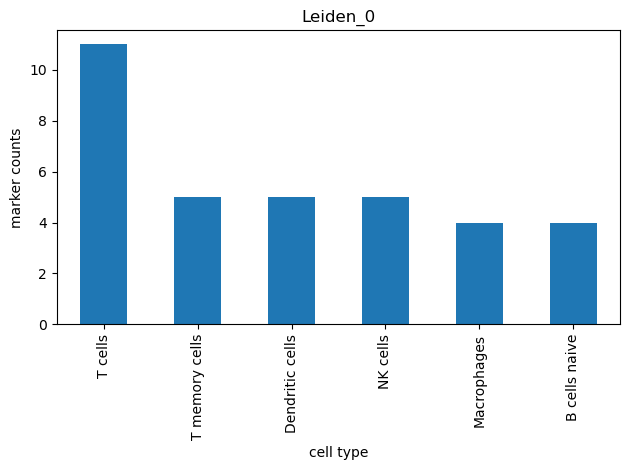

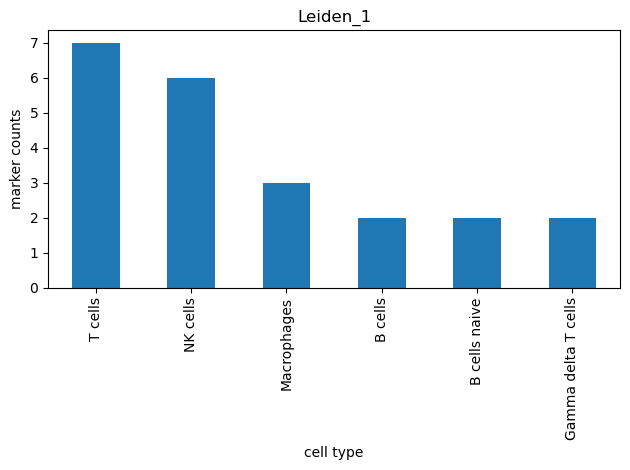

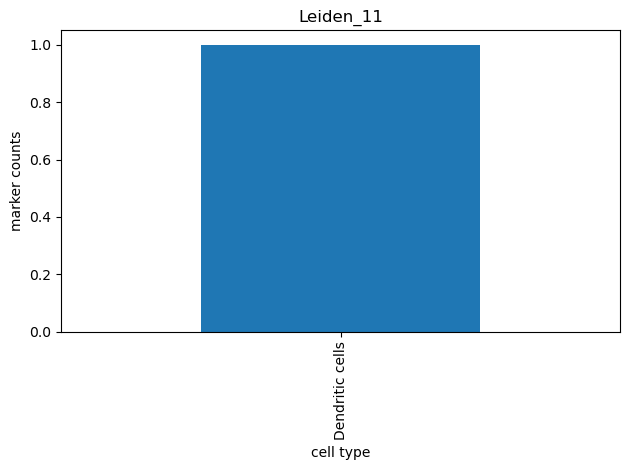

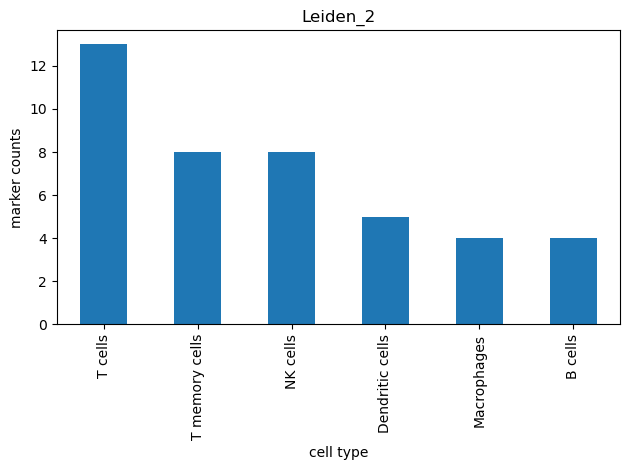

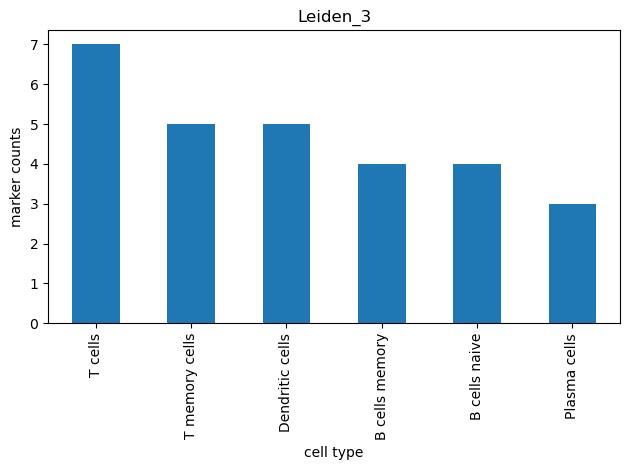

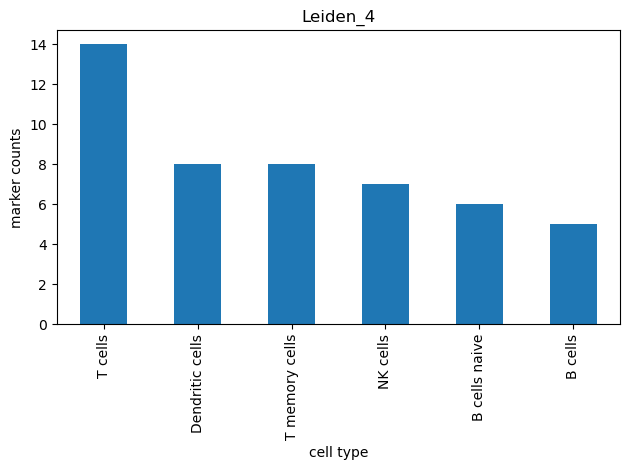

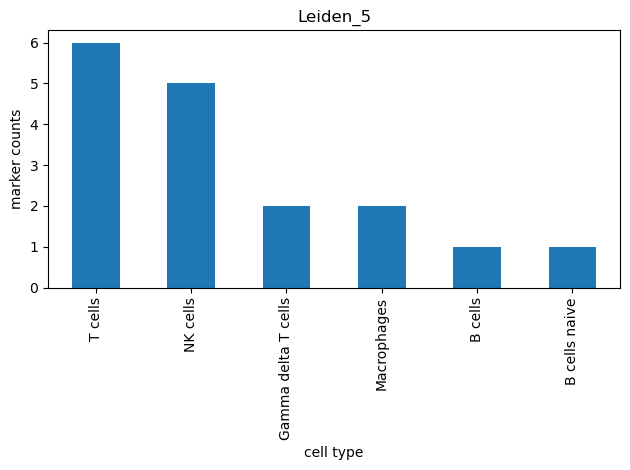

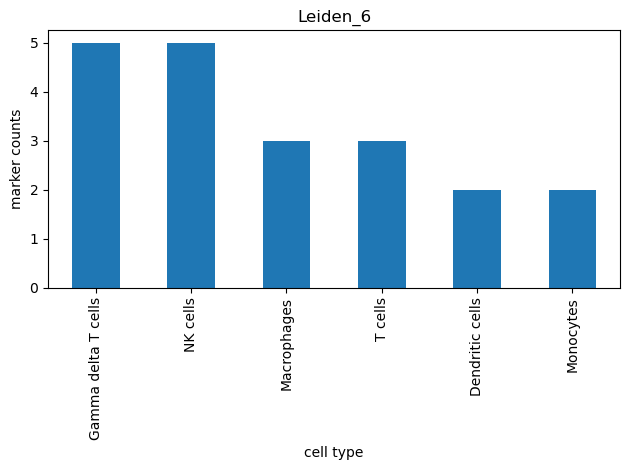

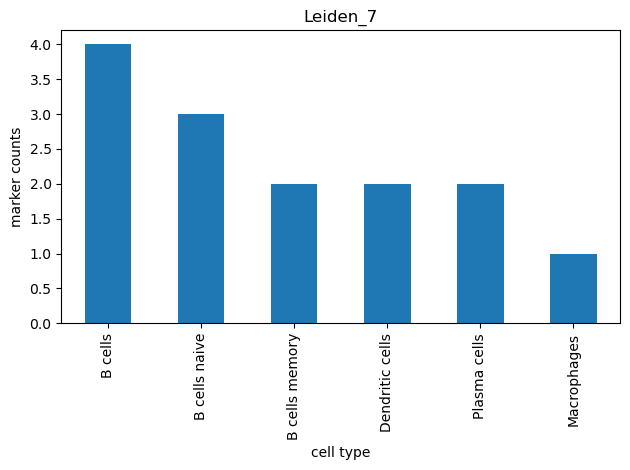

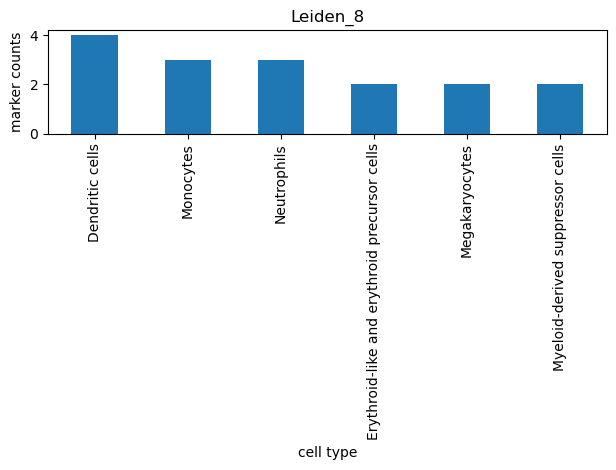

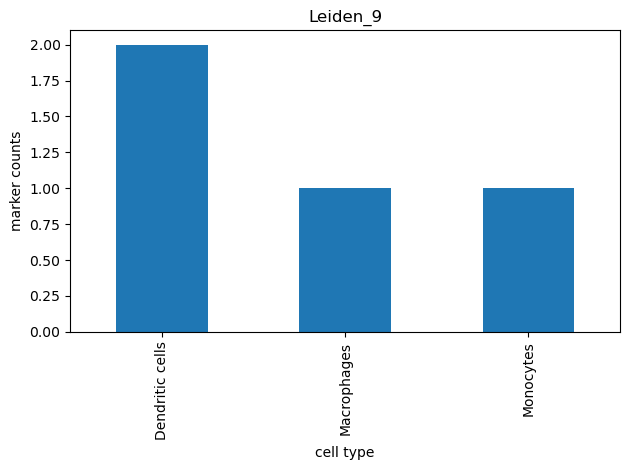

In [45]:
with open('output.txt', 'w') as f:
    for clus in sorted(leiden_clusters):
        common_df = pd.read_csv(f'{clus}_common_w_DB.csv', sep='\t')
        print(f'{clus} cell type counts:', file=f)
        counts = common_df['cell type'].value_counts()
        print(counts, file=f)
        print(file=f)

        if len(counts) == 0:
            continue

        # plot counts
        plt.figure()
        counts[:6].plot(kind='bar')  # Plot only the top 6 bars
        plt.title(clus)
        plt.ylabel('marker counts')
        plt.xlabel('cell type')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'{clus}_marker_counts.png')
        plt.show()